# Usando la distribución binomial


In [4]:
#importando librerias
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$$
P(k, n, p) = \binom n k p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

$$
\begin{array}{ll}
k =& \text{Número de éxitos} \\
n =& \text{Número de lanzamientos}\\
p =& \text{Probabilidad de éxito}\\
\end{array}
$$

In [2]:
# definición de la distribución binomial 
def my_binomial(k, n, p):
  return (factorial(n)/(factorial(k)*(factorial(n-k))))*pow(p,k)*pow(1-p, n-k)

La función anterior representa solo la sustitución de valores cuando le ingresemos algunos.

In [3]:
# Ejemplo con k=2,n=3 y p=0.5
print('my binomial: {}'.format(my_binomial(2, 3, 0.5)))

#Comparación con función binomial de Scipy
dist = binom(3, 0.5)

#Función de probabilidad f(x) (distribuciones discretas)
dist.pmf(2)

my binomial: 0.375


np.float64(0.3750000000000001)

La librería Scipy nos permite usar la función Binomial `binom(n,p)` dado $n$ numero de intentos y $p$ de probabilidad. A su vez este tipo de objeto tiene un método llamado `pmf` (Probability Mass Function) que es el equivalente a **Densidad de probabilidad**.     
Con `dist.pmf(2)` le digo que evalué la función para 2 éxitos dada una distribución **binomial** de $3$ lanzamientos con una probabilidad de $0.5$.

En resumen le decimos todo eso al teclear las lineas de código:
```js
dist.binom(3,0.5)
dist.pmf(2)
```

Por lo que el resultado debería ser el mismo al calculado con la función hecha anteriormente.

Ademas también tenemos otro método ``cdf()`` que es Cumulative Distribution Function o Función de Distribución Acumulada. Y lo que le digo con la siguiente linea de código; es calcula la distribución de probabilidad acumulada de que yo dada esa distribución binomial, obtenga 2 o menos caras.

In [47]:
dist.cdf(2)

np.float64(0.875)

Entonces el `cdf()` es la sumatoria de las probabilidades. En este caso es la formula que viene en el siguiente párrafo. Entonces podemos ver que gracias a los métodos que nos ofrece Scipy, podemos calcular diversos parámetros para una distribución binomial.

## Validación del ejercicio hecho a mano

La formula es entonces para calcular las probabilidades acumuladas, sobre todos los estados que cumplen la condición $k\leq 2$ de la **densidad de probabilidad binomial**. Es una sumatoria porque es una **densidad discreta** y si fuera continua sería una integral.
$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$

Nos proponemos hacer un ejercicio a mano para:

Calcular cual es la probabilidad de que obtenga 2 o menos caras, dados 3 lanzamientos y dada una probabilidad equilibrada de 0.5.

## Distribución de probabilidad acumulada
$$
P(k, n, p) = \sum_{i=0}^k \frac{n!}{i!(n-i)!}\; p^i (1-p)^{n-i}
$$

In [71]:
#Obteniendo el código para calcular la distribución acumulada
from fractions import Fraction

def mi_bino(k,n,p):
    proba_kn=[]
    for ka in range(k+1):
        dis_ka=(factorial(n)/(factorial(ka)*factorial(n-ka)))*(p**ka)*((1-p)**(n-ka))
        print(f'Probabilidad para obtener {ka} caras = {Fraction(dis_ka)}')
        proba_kn.append(Fraction(dis_ka))
        
    proba_acu=sum(proba_kn)
    print(f'\nProbabilidad para obtener {k} o menos caras = {proba_acu}\n')
    return proba_acu,proba_kn


In [72]:
# Probando la función anterior
p_acu,p_kne=mi_bino(2,3,0.5)

print(f'Probabilidad por Kn: {p_kne}')
print(f'Probabilidad total: {p_acu}')

Probabilidad para obtener 0 caras = 1/8
Probabilidad para obtener 1 caras = 3/8
Probabilidad para obtener 2 caras = 3/8

Probabilidad para obtener 2 o menos caras = 7/8

Probabilidad por Kn: [Fraction(1, 8), Fraction(3, 8), Fraction(3, 8)]
Probabilidad total: 7/8


Ahora desarrollaré una función en Simpy para obtener la distribución binomial.

In [50]:
import sympy as sp

def mi_binom(k, n, p):
    k, n, p = sp.symbols('k n p')
    proba_kn = []
    for ka in range(k_val + 1):
        dis_ka = (sp.factorial(n) / (sp.factorial(ka) * sp.factorial(n - ka))) * (p ** ka) * ((1 - p) ** (n - ka))
        dis_ka = dis_ka.subs({n: n_val, p: sp.Rational(p_val)})
        proba_kn.append(dis_ka)
        print(f'Probabilidad para obtener {ka} caras = {dis_ka}')

    proba_acu = sum(proba_kn)
    print(f'\nProbabilidad para obtener {k_val} o menos caras = {proba_acu}\n')
    return proba_acu, proba_kn

In [51]:
# Valores específicos:
k_val = 2
n_val = 3
p_val = 0.5

proba_acu, proba_kn = mi_binom(k_val, n_val, p_val)
print(f'Probabilidad por Kn: {proba_kn}')
print(f'Probabilidad total: {proba_acu}')

Probabilidad para obtener 0 caras = 1/8
Probabilidad para obtener 1 caras = 3/8
Probabilidad para obtener 2 caras = 3/8

Probabilidad para obtener 2 o menos caras = 7/8

Probabilidad por Kn: [1/8, 3/8, 3/8]
Probabilidad total: 7/8


In [39]:
import sympy as sp

def mi_binomial(k_val, n_val, p_val):
    k, n, p = sp.symbols('k n p')
    proba_kn = []
    for ka in range(k_val + 1):
        dis_ka = (sp.factorial(n) / (sp.factorial(ka) * sp.factorial(n - ka))) * (p ** ka) * ((1 - p) ** (n - ka))
        dis_ka = dis_ka.subs({n: n_val, p: sp.Rational(p_val)})
        proba_kn.append(dis_ka)
        print(f'Probabilidad para obtener {ka} caras = {sp.latex(dis_ka)}')

    proba_acu = sum(proba_kn)
    print(f'\nProbabilidad para obtener {k_val} o menos caras = {sp.latex(proba_acu)}')
    return proba_acu, proba_kn

# Valores específicos:
k_val = 3
n_val = 10
p_val = 0.5

proba_acu, proba_kn = mi_binomial(k_val, n_val, p_val)

Probabilidad para obtener 0 caras = \frac{1}{1024}
Probabilidad para obtener 1 caras = \frac{5}{512}
Probabilidad para obtener 2 caras = \frac{45}{1024}
Probabilidad para obtener 3 caras = \frac{15}{128}

Probabilidad para obtener 3 o menos caras = \frac{11}{64}


## Simulaciones de secuencias con generadores aleatorios

Vamos a entrar a la parte final del código, implementando generadores aleatorios.

>Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

Si recuerdas en clases pasadas, habíamos hablado de la escuela **Frecuentista** que tenia como enemigo a la escuela  **Bayesiana**.

El tema de generadores aleatorios tiene que ver mucho con esta escuela (**Frecuentista**). Porque los generadores aleatorios, tiene que ver con el hecho de que sean como unas simulaciones computarizadas que producen experimentos aleatorios como si fueran de la vida real. Como recordemos en el experimento de la moneda, la probabilidad de lazar una moneda que caiga en cara es de $\frac 1 2$, pero eso no necesariamente quiere decir que de 10 lanzamientos 5 serán cara. Lo que quiere decir es que; en la medida en que tu numero de lanzamientos es cada vez mas grande, la fracción del total de caras que tu obtienes se acerca al 50% y esa filosofía es lo que se verá reflejado con el uso de estos generadores aleatorios. Cuando nos encontramos con paginas web, y encontramos este tipo de juegos, nos dan lo que sería el lanzamiento de un dado o una moneda como si fuera en la vida real.

Así pues lo que hacemos es usar algoritmos determinísticos computacionales ára generar algo que de alguna manera se aproxima a un procesos aleatorio, sobre el cual no podemos predecir exactamente y eso es muy util, porque de esa manera podemos experimentar situaciones reales sencillos con algoritmos determinísticos.

Vamos a simular este proceso de lanzamiento, y cada vez incrementando el numero de lanzamientos para comprobar que la probabilidad, se va acercando cada vez más a 0.5

In [54]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
#Metodo de numpy
binomial(n, p)

3

In [55]:
# Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a 3 monedas
arr = []
#Haciendo una estructura de control de loop
#Un de 0 a 99
for _ in range(100):
  # El _ en el loop es para indicar que no se usará variable
  arr.append(binomial(n, p))

Si obtengo esos resultados, veremos que hay números aleatorios, ahora para ver de manera gráfica el resultado, procederemos a realizar un histograma

In [56]:
arr

[1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 3,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 3,
 2,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 3,
 2,
 2,
 1,
 2,
 3,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 2,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 0,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1]

## Explicación del código siguiente
Los resultados posibles de los lanzamientos son(values):
- 0 caras
- 1 cara
- 2 caras
- 3 caras

Luego vuelvo a ejecutar el código de generación de eventos aleatorios.
```js
  for _ in range(num_trials):
    arr.append(binomial(3, 0.5))
```
- `num_trials:` Es el número de intentos, es decir vamos a realizar un experimento de  `num_trials` veces `3 lanzamientos`de moneda.

Una vez que se ejecutaron esos experimentos aleatorios, le dire construye una distribución simulada.

**¿Qué quiere decir una distribución simulada?**    
Si nos damos cuenta la lista `arr` es en realidad una simulación de muchos experimentos. Para yo obtener las frecuencias de ocurrencia, lo que debo calcular es: **cuantas veces aparece** cada uno de los elementos en la lista, eso se hace con una función llamada `unique()`.Cuando le pongo

```js
np.unique(arr,return_counts=True)
```

Le estoy diciendo que identifique todos los elementos únicos de una lista, además le puedo decir `return_counts=True`para que me diga cuantas veces apareció un elemento


In [57]:
np.unique(arr,return_counts=True)

(array([0, 1, 2, 3]), array([11, 39, 40, 10]))

Lo anterior me dice:
- 0 caras se obtuvieron 11 veces
- 1 cara se obtuvieron 39 veces
- 2 caras se obtuvieron 40 veces y
- 3 caras se obtuvieron 10 veces

Como se puede ver `array[0,1,2,3]` es `np.unique(arr,return_counts=True)[0]` y `array([11, 39, 40, 10]` es `np.unique(arr,return_counts=True)[1]`. Por eso en el código vamos a usar este ultimo elemento de la lista, de aquí obtenemos el conteo que nos interesa, 

Ahora para calcular la probabilidad hacemos:
```js
np.unique(arr, return_counts=True)[1]/len(arr)
```

In [58]:
np.unique(arr, return_counts=True)[1]/len(arr)

array([0.11, 0.39, 0.4 , 0.1 ])

Entonces a lo anterior lo vamos a llamar una **distribución simulada**. Y obtendremos una lista con los valores.

Después voy a obtener una distribución teórica mediante una distribución binomial.

```js
distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
```

In [60]:
values = [0,1,2,3]
distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
distribucion_teorica

[np.float64(0.12499999999999999),
 np.float64(0.3750000000000001),
 np.float64(0.3750000000000001),
 np.float64(0.125)]

Entonces como podemos observar estos valores son algo distintos a los anteriores. De aquí viene la filosofía tipo frecuentista.

Entonces podemos decir que la simulada se parece a la teórica pero no tanto. Entonces el código terminado nos reflejará que cuando yo le de a `num_trials` un numero grande, ambas respuestas deberían acercarse más, puesto que esa es la finalidad. Ver como la probabilidad se va acercando mas de acuerdo a lo que dice la escuela Frecuentista.

El resto de código será para dibujar los diagramas o gráficas correspondientes a cada distribución en matplot lib.

In [68]:
#Definiendo función para simular los eventos 
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(3, 0.5))
  distribucion_simulada = np.unique(arr, return_counts=True)[1]/len(arr)
  distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
  plt.bar(values, distribucion_teorica, label = 'Teoría', color = 'red')
  plt.bar(values, distribucion_simulada, label = 'Simulación', alpha = 0.6, color = 'blue')
  plt.title('Simulación con {} experimentos'.format(num_trials))
  plt.show()


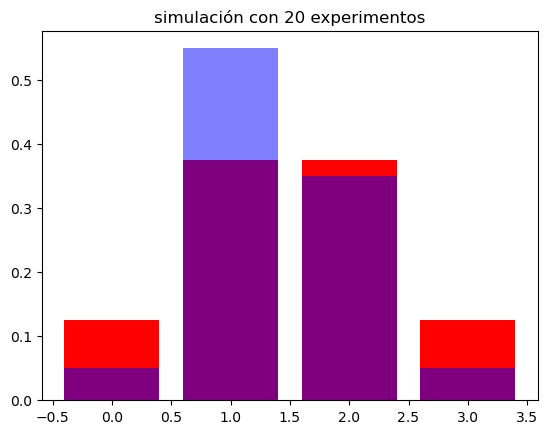

In [67]:
#Desplegando los diferentes resultados
#Haciendo una simulación para 20 intentos
plot_hist(20)

Si nos damos cuenta en azul se encuentran los resultados teóricos y en rojo los resultados simulados. Pero no están iguales.

¿Qué sucede si hago un experimento con mayor numero de veces?

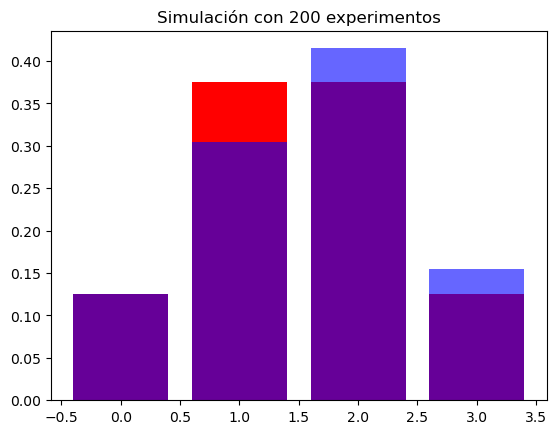

In [69]:
#Haciendo una simulación para 200 intentos
plot_hist(200)

Observamos que tanto la distribución teórica como la simulada empiezan a parecerse. Intentemoslo con un mayor numero de veces, para ver si en algún punto tiende a tener un comportamiento como el esperado por la teoría frecuentista.

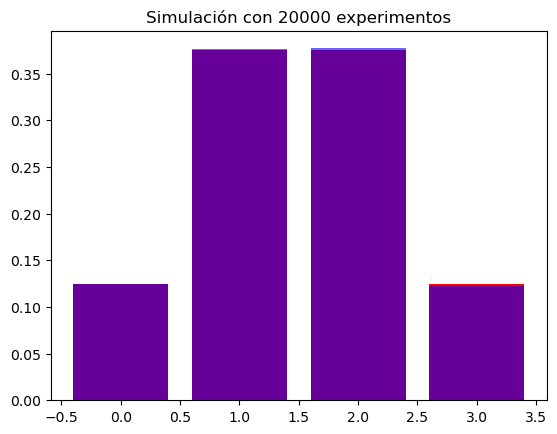

In [70]:
#Haciendo una simulación para 20000 intentos
plot_hist(20000)

En este ultimo dibujo las distribuciones son prácticamente la misma

Con esto concluimos. Nuestro experimento simulado nos permitió ver la filosofía de la escuela frecuentista, donde; **las probabilidades teórica se cumplen en el que el numero de experimentos es muy grande**. Así hemos obtenido una validación y este esquema realmente es más común de lo que se cree, porque aveces en la vida real hacer experimentos más complicados es más costoso, pero si podemos reemplazarlos por versiones simuladas computacionales, será relativamente mas económico hacer experimentos que validen nuestros ejercicios científicos o de análisis de ciencia de datos.

## Extras:

- [Scipy binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)
- [Numpy binom](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.binomial.html)

David R. Anderson Dennis J. Sweeney Thomas A. Williams

Si lo busca en el buscador , en el primer resultado lo encontrará para descargar en pdf, tiene 1090 pag